<a href="https://colab.research.google.com/github/ernie-Griffiths/Determining-the-Validity-of-Genetically-Engineered-Crops-in-a-Warming-Climate-Using-Machine-Learning/blob/main/KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 100)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
Phenotype_Soil_Weather_Data = pd.read_csv("/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Finalised data/FeatureSelected_Phenotype_Soil_Weather_Data.csv",index_col=[0])

In [ ]:
Phenotype_Soil_Weather_Data['Texture'] = pd.factorize(Phenotype_Soil_Weather_Data['Texture'])[0] + 1
Phenotype_Soil_Weather_Data['Seed Success factor'] = Phenotype_Soil_Weather_Data['Seed Success factor'].round(decimals = 3)
Phenotype_Soil_Weather_Data = Phenotype_Soil_Weather_Data.dropna()
Phenotype_Soil_Weather_Data.head(2)

,Field-Location,Source,Pedigree,Family,Tester,Replicate,Block,Range,Pass,Anthesis [MM/DD/YY],Silking [MM/DD/YY],Anthesis [days],Silking [days],Plant Height [cm],Ear Height [cm],Stand Count [# of plants],Grain Moisture [%],Test Weight [lbs],Plant Month,Harvest Month,Location,E Depth,1:1 Soil pH,WDRF Buffer pH,1:1 S Salts mmho/cm,Texture No,Organic Matter LOI %,Nitrate-N ppm N,lbs N/A,Potassium ppm K,Sulfate-S ppm S,Calcium ppm Ca,Magnesium ppm Mg,Sodium ppm Na,CEC/Sum of Cations me/100g,%H Sat,%K Sat,%Ca Sat,%Mg Sat,%Na Sat,Mehlich P-III ppm P,% Sand,% Silt,% Clay,Texture,Temperature [C],Dew Point [C],Relative Humidity [%],Solar Radiation [W/m2],Rainfall [mm],Wind Speed [m/s],Wind Direction [degrees],Wind Gust [m/s],Soil Temperature [C],Seed Success factor
0,DEH1,WIPV17/30359,PHN11_PHW65_0512/PHT69,PHN11_PHW65,PHT69,1.0,1,2.0,2.0,7/2/2019,7/2/2019,54.0,54.0,274.0,117.0,60.0,20.0,57.2,5.0,9.0,DEH1,8.0,6.6,7.2,0.13,1.0,2.4,28.6,69.0,125.0,15.0,487.0,75.0,8.0,3.4,0.0,9.0,71.0,18.0,1.0,136.0,81.0,9.0,10.0,1,23.041976,13.951074,72.528273,212.490939,0.012235,0.22562,141.449484,6.775455,23.81826,1.525
1,DEH1,WIPV17/30278,PHN11_PHW65_0278/PHT69,PHN11_PHW65,PHT69,1.0,1,2.0,3.0,7/2/2019,7/2/2019,54.0,54.0,251.0,121.0,58.0,19.5,54.5,5.0,9.0,DEH1,8.0,6.6,7.2,0.13,1.0,2.4,28.6,69.0,125.0,15.0,487.0,75.0,8.0,3.4,0.0,9.0,71.0,18.0,1.0,136.0,81.0,9.0,10.0,1,23.041976,13.951074,72.528273,212.490939,0.012235,0.22562,141.449484,6.775455,23.81826,2.057


In [ ]:
xdata = Phenotype_Soil_Weather_Data.drop(["Seed Success factor","Field-Location",	"Source","Pedigree",	"Family",	"Tester",	"Replicate",	"Block","Anthesis [MM/DD/YY]","Silking [MM/DD/YY]","Location"], axis = 1)
ydata = Phenotype_Soil_Weather_Data["Seed Success factor"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.3,shuffle = True, random_state = 42)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4009590746406415
RMSE value for k=  2 is: 0.3514766553922384
RMSE value for k=  3 is: 0.33814112223085724
RMSE value for k=  4 is: 0.3273581426870183
RMSE value for k=  5 is: 0.3218280047073275
RMSE value for k=  6 is: 0.31836659960979613
RMSE value for k=  7 is: 0.3157711787943641
RMSE value for k=  8 is: 0.3160326494998443
RMSE value for k=  9 is: 0.31489116590185523
RMSE value for k=  10 is: 0.3148194311087992
RMSE value for k=  11 is: 0.31447581300748517
RMSE value for k=  12 is: 0.31469485571375927
RMSE value for k=  13 is: 0.31365774317505735
RMSE value for k=  14 is: 0.31290934554149114
RMSE value for k=  15 is: 0.31364480996314414
RMSE value for k=  16 is: 0.31283055503584095
RMSE value for k=  17 is: 0.31283908065793503
RMSE value for k=  18 is: 0.31289164369964584
RMSE value for k=  19 is: 0.3133156339357675
RMSE value for k=  20 is: 0.31323402827341096


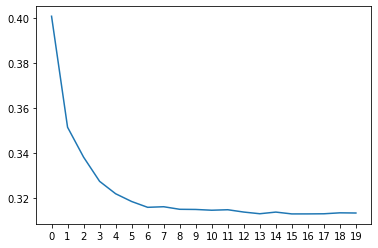

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve
plt.xticks(np.arange(0,20+1, 1.0))
plt.plot(curve)

In [ ]:

# params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

# knn = neighbors.KNeighborsRegressor()

# model = GridSearchCV(knn, params, cv=5)
# model.fit(x_train,y_train)
# model.best_params_

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 6)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc_score = r2_score(y_test, y_pred)
Mean_Error = mean_squared_error(y_test, y_pred, squared=False)
print("Accuracy score")
print(acc_score)
print("Error Bracket")
print(Mean_Error)


Results = pd.read_csv("/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Results /LAResults.csv",index_col=[0])

dict = {'Learning Algorithum': 'KNN Regression', 'R2 Score': acc_score, 'Error Bracket': Mean_Error}

Results = Results.append(dict, ignore_index = True)


Accuracy score
0.6931631577640994
Error Bracket
0.31836659960979613


In [ ]:
Results

,Learning Algorithum,R2 Score,Error Bracket
0,Regression Tree,0.671146,0.332852
1,Random Forest,0.720002,0.303280
2,KNN Regression,0.693163,0.318367
3,Gradient Boosting Regressor,0.741307,0.295217
4,Convolutional Nerual Network,0.696746,0.319638
5,MLP Regressor,0.723194,0.305378
6,Radial Basis Function NN,0.722957,0.528065
7,Random Forest,0.720002,0.303280
8,KNN Regression,0.693163,0.318367


In [ ]:
#Results.to_csv('LAResults.csv')
#!cp LAResults.csv "/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Results "

In [ ]:
import pickle
filename = 'KNN_model.sav'
pickle.dump(model, open(filename, 'wb'))